In [1]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from celluloid import Camera
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# import logit model
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from logistic_regression import LogisticRegression

In [2]:
# Read the input data
df = pd.read_csv("draft_dataset_gemastik1.csv")

#(0 - normal, 1 - disease)

# Print a summary
print(f"Number of subjects: {df.shape[0]}")
print("Subjects diagnosed with heart disease: "
      f"{df['kondisi'].sum() / df.shape[0] * 100:0.2f}%")
print(f"Number of NaN values in the dataset: {df.isnull().sum().sum()}")

# Show the table
df.head()

Number of subjects: 142
Subjects diagnosed with heart disease: 52.11%
Number of NaN values in the dataset: 0


,S1_split,S2_split,s1,s2,kondisi
0,0.27,0.55,0.522,0.789,0
1,0.24,0.50,1.334,1.570,0
2,0.25,0.46,2.069,2.324,0
3,0.31,0.50,2.785,3.092,0
4,0.25,0.50,3.593,3.846,0


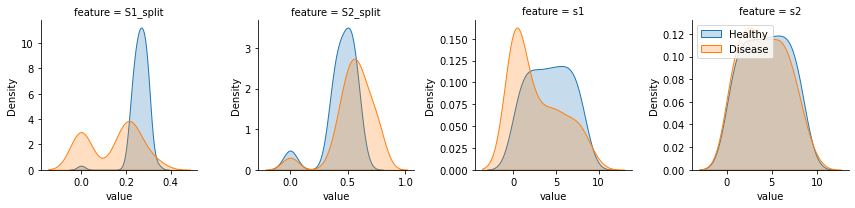

In [3]:
import seaborn as sns

# plot SNS
long_df = pd.melt(df, df.columns[-1], df.columns[:-1], var_name="feature")

g = sns.FacetGrid(long_df, col="feature", hue="kondisi", 
                sharex=False, sharey=False, col_wrap=5, )
                # palette="flare")
g.map(sns.kdeplot, "value", shade=True)
plt.legend(labels=["Healthy", "Disease"], loc="upper left")
plt.show()

In [4]:
# Split the dataset into train/test datasets.
targets = df.pop("kondisi")  # remove the target label from the dataframe

# create the test:train split
x_train, x_test, y_train, y_test = train_test_split(
    df, targets, test_size=0.25, random_state=42
)

# Normalize the continuous features, ignore discrete (here treat age as continuous)
features_to_standardize = ["S1_split", "S2_split", "s1", "s2"]

column_transformer = ColumnTransformer(
    [("scaler", StandardScaler(), features_to_standardize)], remainder="passthrough"
)
x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)

In [5]:
# Create and train the model
model = LogisticRegression(n_input_features=x_train.shape[-1])

costs, accuracies, weights, bias = model.train(x_train, y_train,
                    epochs=5000,
                    learning_rate=0.01,
                    minibatch_size=None,
                    verbose=True)

# Predict the test labels
predictions = model.predict(x_test)
accuracy = model.accuracy(predictions, y_test)
print(f"Model test prediction accuracy: {accuracy:0.2f}%")

Epoch: 2851, Cost:  0.44          

Epoch: 3763, Cost:  0.44          

Final model cost: 0.43              
Model test prediction accuracy: 83.33%


In [6]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.65      0.79        17

    accuracy                           0.83        36
   macro avg       0.88      0.82      0.82        36
weighted avg       0.87      0.83      0.83        36

